# Handwritten classification using neural networks

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Loading dataset
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [35]:
len(X_train)

60000

In [36]:
X_train[0].shape

(28, 28)

In [37]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

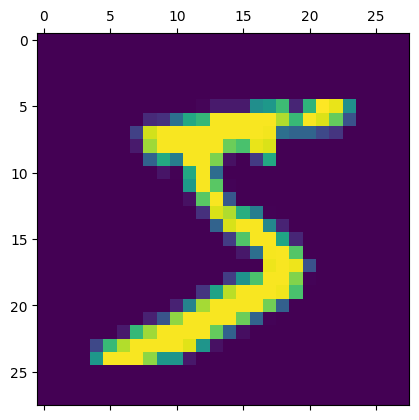

In [38]:
plt.matshow(X_train[0]);

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_train = X_train/255
X_test = X_test/255

In [41]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
X_train_flatten.shape

(60000, 784)

In [43]:
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_test_flatten.shape

(10000, 784)

In [44]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")])
model.compile(
optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]

)
model.fit(X_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8138 - loss: 0.7207
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9149 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.9203 - loss: 0.2839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.9235 - loss: 0.2707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.9271 - loss: 0.2582


In [45]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9170 - loss: 0.3004


[0.2650105655193329, 0.927299976348877]

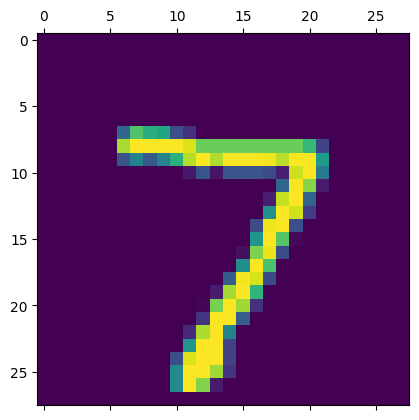

In [46]:
plt.matshow(X_test[0])

In [47]:
y_pred = model.predict(X_test_flatten)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


array([1.6048601e-02, 2.7641630e-07, 6.3522726e-02, 9.6734732e-01,
       3.5992481e-03, 1.4959973e-01, 1.4522111e-06, 9.9979645e-01,
       1.0013500e-01, 6.6244781e-01], dtype=float32)

In [48]:
np.argmax(y_pred[0])

7

In [49]:
y_predict_label = [np.argmax(i) for i in y_pred]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
confusion = tf.math.confusion_matrix(labels=y_test, predictions = y_predict_label )
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    7,    7,    4,    3,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    6,  937,   19,    7,    4,   10,   12,   31,    3],
       [   1,    0,   17,  927,    0,   25,    2,   11,   19,    8],
       [   1,    1,    6,    2,  915,    0,    8,    4,   10,   35],
       [   7,    2,    5,   33,   11,  782,   10,    7,   29,    6],
       [   8,    3,    8,    2,    7,   19,  906,    2,    3,    0],
       [   1,    5,   21,    8,    3,    0,    0,  956,    3,   31],
       [   4,    6,    6,   23,    9,   28,    9,   11,  871,    7],
       [   7,    7,    2,   11,   27,    7,    0,   26,    9,  913]])>

Text(158.22222222222223, 0.5, 'Truth')

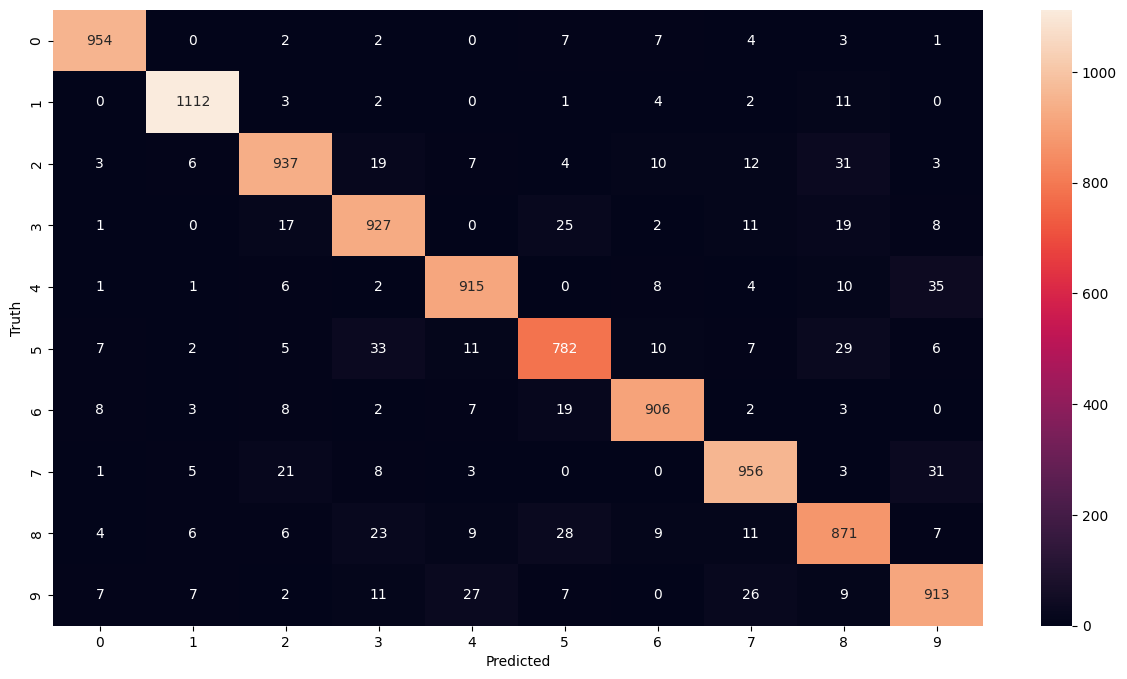

In [52]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

    

In [53]:
model = keras.Sequential([
    
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid"),
                         
                         
                         
                         ])
model.compile(
optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]

)
model.fit(X_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8684 - loss: 0.4639
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9601 - loss: 0.1385
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.0943
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9770 - loss: 0.0742
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0551


In [54]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9670 - loss: 0.1092


[0.09211307018995285, 0.9725000262260437]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(158.22222222222223, 0.5, 'Truth')

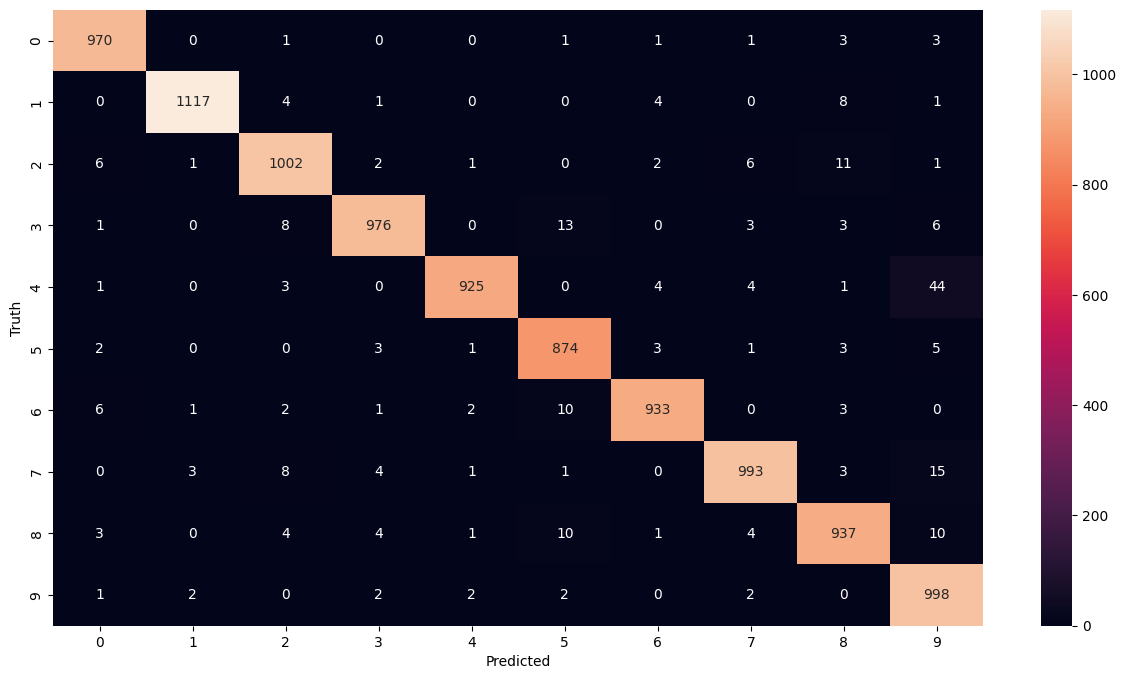

In [56]:
y_pred = model.predict(X_test_flatten)
y_predict_label = [np.argmax(i) for i in y_pred]
confusion = tf.math.confusion_matrix(labels=y_test, predictions = y_predict_label )

plt.figure(figsize=(15,8))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Conclusion**

The neural networks are used for classifying the handwritten digits. The accuracy of the developed model is increased when hidden layer is used from 92% to 97%. The confusion matrix also shows less number of errors.